In [248]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [249]:
countries = pd.read_csv("countries.csv")
test = pd.read_csv("test_users.csv")
train = pd.read_csv("train_users_2.csv")
sessions = pd.read_csv("sessions.csv")

In [250]:
print(test.age.describe())
print()
print(train.age.describe())

count    33220.000000
mean        37.616677
std         74.440647
min          1.000000
25%         26.000000
50%         31.000000
75%         40.000000
max       2002.000000
Name: age, dtype: float64

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64


In [251]:
df = pd.concat([train,test])

C:\Users\prafu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [252]:
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser                   0
first_device_type               0
gender                          0
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [253]:
df.age.describe()
df.loc[df['age']>98,'age'] = np.NaN
df.loc[df['age']<18,'age'] = np.NaN
df.age.describe()

count    155753.000000
mean         36.050786
std          11.601080
min          18.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          98.000000
Name: age, dtype: float64

In [254]:
df.age = df.age.fillna(33)

In [255]:
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                             0
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser                   0
first_device_type               0
gender                          0
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

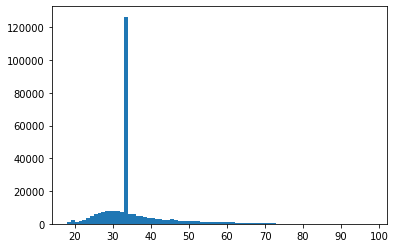

In [256]:
plt.hist(df[df.age <= 100].age, bins = 80)
plt.show()

In [257]:
df.age.isnull().sum()

0

In [258]:
df.first_affiliate_tracked = df.first_affiliate_tracked.fillna("untracked")
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                             0
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked         0
first_browser                   0
first_device_type               0
gender                          0
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [259]:
print(df.gender.unique())
df.gender.replace("-unknown-", "OTHER", inplace=True)
df.gender.fillna("OTHER")
df.gender.value_counts()

['-unknown-' 'MALE' 'FEMALE' 'OTHER']


OTHER     129814
FEMALE     77524
MALE       68209
Name: gender, dtype: int64

In [260]:
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                             0
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked         0
first_browser                   0
first_device_type               0
gender                          0
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [261]:
df.country_destination = df.country_destination.dropna()
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                             0
country_destination             0
date_account_created            0
date_first_booking         186639
first_affiliate_tracked         0
first_browser                   0
first_device_type               0
gender                          0
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [262]:
df.date_account_created = pd.to_datetime(df.date_account_created, format='%Y-%m-%d')
df.date_first_booking = pd.to_datetime(df.date_first_booking, format='%Y-%m-%d')

In [264]:
df['year_first_booking'] = df.date_first_booking.dt.year
df['month_first_booking'] = df.date_first_booking.dt.month
df['weekday_first_booking'] = df.date_first_booking.dt.weekday

In [269]:
dt=df.year_first_booking.mode()
df['year_first_booking'].fillna(dt.max(), inplace = True)
df.month_first_booking = df.month_first_booking.fillna(df.month_first_booking.mode().max())
df.weekday_first_booking += 1
df.weekday_first_booking = df.weekday_first_booking.fillna(0)

In [266]:
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                             0
country_destination             0
date_account_created            0
date_first_booking         186639
first_affiliate_tracked         0
first_browser                   0
first_device_type               0
gender                          0
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
year_first_booking              0
month_first_booking             0
weekday_first_booking           0
dtype: int64

In [267]:
df= df.drop(columns = ['date_first_booking'])

In [268]:
df.isnull().sum()

affiliate_channel          0
affiliate_provider         0
age                        0
country_destination        0
date_account_created       0
first_affiliate_tracked    0
first_browser              0
first_device_type          0
gender                     0
id                         0
language                   0
signup_app                 0
signup_flow                0
signup_method              0
timestamp_first_active     0
year_first_booking         0
month_first_booking        0
weekday_first_booking      0
dtype: int64